<h1>Reading The Data File</h1>

In [101]:
import scipy

In [102]:
from scipy.io import arff

In [103]:
dataset=arff.loadarff('trainProdSelection.arff')

In [104]:
print(dataset)

(array([(b'student', b'spend>saving',  6.,  40., 13.62  , 3.28040e+00, b'C1'),
       (b'student', b'spend>saving', 11.,  21., 15.32  , 2.02320e+00, b'C1'),
       (b'student', b'spend>saving',  7.,  64., 16.55  , 3.12020e+00, b'C1'),
       (b'student', b'spend>saving',  3.,  47., 15.71  , 3.40220e+00, b'C1'),
       (b'student', b'spend>saving', 15.,  10., 16.96  , 2.28250e+00, b'C1'),
       (b'student', b'spend>saving',  6.,  80., 15.5   , 3.73380e+00, b'C1'),
       (b'student', b'spend<saving', 10.,  49., 16.86  , 5.86390e+00, b'C1'),
       (b'student', b'spend<saving', 10.,  84., 14.66  , 3.18700e+00, b'C1'),
       (b'student', b'spend<saving',  9.,  74., 13.86  , 2.38230e+00, b'C1'),
       (b'student', b'spend>>saving', 22.,  38., 13.88  , 7.39400e-01, b'C1'),
       (b'student', b'spend>>saving', 25.,  30., 15.64  , 3.12820e+00, b'C1'),
       (b'student', b'spend>>saving', 31.,  15., 14.4   , 2.39250e+00, b'C1'),
       (b'student', b'spend>>saving', 24.,  55., 15.55  , 1.

In [105]:
import pandas as pd

In [106]:
trainset=pd.DataFrame(dataset[0])

In [107]:
trainset.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,b'student',b'spend>saving',6.0,40.0,13.62,3.2804,b'C1'
1,b'student',b'spend>saving',11.0,21.0,15.32,2.0232,b'C1'
2,b'student',b'spend>saving',7.0,64.0,16.55,3.1202,b'C1'
3,b'student',b'spend>saving',3.0,47.0,15.71,3.4022,b'C1'
4,b'student',b'spend>saving',15.0,10.0,16.96,2.2825,b'C1'


In [108]:
def Convet_byte_string(dataframe,coloums):
    for i in coloums:
        dataframe[i]=dataframe[i].str.decode("utf-8")
    return dataframe
    
    

In [109]:
trainset=Convet_byte_string(trainset,['Type','LifeStyle','label'])

In [110]:
trainset.head()

,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,6.0,40.0,13.62,3.2804,C1
1,student,spend>saving,11.0,21.0,15.32,2.0232,C1
2,student,spend>saving,7.0,64.0,16.55,3.1202,C1
3,student,spend>saving,3.0,47.0,15.71,3.4022,C1
4,student,spend>saving,15.0,10.0,16.96,2.2825,C1


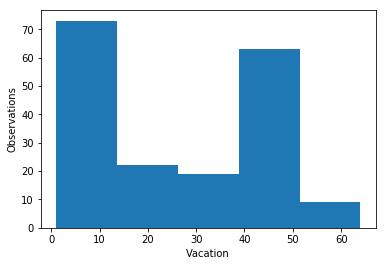

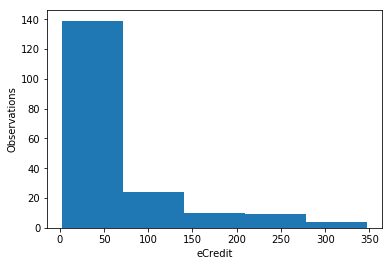

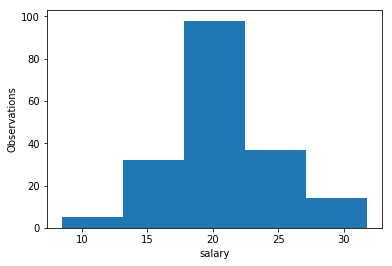

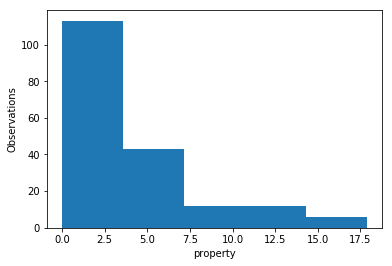

In [111]:
from matplotlib import pyplot as plt
for i in ["Vacation","eCredit","salary","property"]:
    plt.hist(trainset[i],bins=5)
    plt.xlabel(i)
    plt.ylabel("Observations")
    plt.show()
    

In [112]:
minValue = trainset.Vacation.min()
maxValue = trainset.Vacation.max()
trainset.Vacation = trainset.Vacation.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = trainset.eCredit.min()
maxValue = trainset.eCredit.max()
trainset.eCredit = trainset.eCredit.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = trainset.salary.min()
maxValue = trainset.salary.max()
trainset.salary = trainset.salary.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = trainset.property.min()
maxValue = trainset.property.max()
trainset.property = trainset.property.apply(lambda x:(x-minValue)/(maxValue-minValue))

In [113]:
valid_set=trainset[0:160]

In [114]:
train_set=trainset[160:]
print(train_set.head())
valid_set.head()

          Type      LifeStyle  Vacation   eCredit    salary  property label
160  professor  spend>>saving  0.777778  0.005814  0.611056  0.186268    C5
161  professor  spend>>saving  0.777778  0.000000  0.476818  0.161874    C5
162  professor  spend>>saving  0.777778  0.000000  0.409700  0.164220    C5
163  professor  spend>>saving  0.793651  0.008721  0.785306  0.133211    C5
164  professor  spend>>saving  0.761905  0.005814  0.991395  0.147797    C5


,Type,LifeStyle,Vacation,eCredit,salary,property,label
0,student,spend>saving,0.079365,0.107558,0.219960,0.183167,C1
1,student,spend>saving,0.158730,0.052326,0.293102,0.112797,C1
2,student,spend>saving,0.095238,0.177326,0.346023,0.174200,C1
3,student,spend>saving,0.031746,0.127907,0.309882,0.189984,C1
4,student,spend>saving,0.222222,0.020349,0.363663,0.127311,C1


><h2>Finding Ecucidian Distance</h2>

In [215]:
import math
def euclideanDistance(instance1,instance2,length):
    distance = 0
    if(instance1[0]==instance2[0]):
        distance += 1
    if(instance1[1]!=instance2[1]):
        distance += 0
    for x in range(2,length,1):        
            distance += pow((instance1[x]-instance2[x]),2)
    return math.sqrt(distance)

<h2>Finding Neighbours</h2>

In [283]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
#     print(testInstance)
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
#         print(trainingSet[x][-1])
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
#     print(distances)
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
#     print(neighbors)
    return neighbors

<h2>Summrizing the neighbours</h2>

In [284]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

<h2>Accuracy</h2>

In [285]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [286]:
data = arff.loadarff('testProdSelection.arff')
Dtest = pd.DataFrame(data[0])

In [287]:
Dtest.Type = Dtest.Type.str.decode("UTF-8")
Dtest.LifeStyle = Dtest.LifeStyle.str.decode("UTF-8")
Dtest.label = Dtest.label.str.decode("UTF-8")

In [288]:
minValue = Dtest.Vacation.min()
maxValue = Dtest.Vacation.max()
Dtest.Vacation = Dtest.Vacation.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = Dtest.eCredit.min()
maxValue = Dtest.eCredit.max()
Dtest.eCredit = Dtest.eCredit.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = Dtest.salary.min()
maxValue = Dtest.salary.max()
Dtest.salary = Dtest.salary.apply(lambda x:(x-minValue)/(maxValue-minValue))

minValue = Dtest.property.min()
maxValue = Dtest.property.max()
Dtest.property = Dtest.property.apply(lambda x:(x-minValue)/(maxValue-minValue))

<h2>Main</h2>

In [289]:
def main(trainingSet,testSet):
    # generate predictions
    predictions=[]
#     print(trainingSet,testSet)
    k = 3
#     print(testSet.head())
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print(pd.Series(predictions).value_counts()/len(predictions))
    print('Accuracy: ' + repr(accuracy) + '%')

In [290]:
main(trainset.values.tolist(),Dtest.values.tolist())

> predicted='C2', actual='C1'
> predicted='C5', actual='C1'
> predicted='C4', actual='C1'
> predicted='C1', actual='C1'
> predicted='C2', actual='C1'
> predicted='C2', actual='C1'
> predicted='C2', actual='C1'
> predicted='C2', actual='C1'
> predicted='C1', actual='C1'
> predicted='C3', actual='C1'
> predicted='C3', actual='C1'
> predicted='C1', actual='C1'
> predicted='C4', actual='C1'
> predicted='C1', actual='C1'
> predicted='C4', actual='C1'
> predicted='C1', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C5', actual='C1'
> predicted='C4', actual='C1'
C4    0.333333
C2    0.238095
C1    0.238095
C3    0.095238
C5    0.095238
dtype: float64
Accuracy: 23.809523809523807%


In [294]:
main(trainset.values[:,[0,1,2,4,5,6]],Dtest.values[:,[0,1,2,4,5,6]])

> predicted='C2', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C1', actual='C1'
> predicted='C2', actual='C1'
> predicted='C1', actual='C1'
> predicted='C2', actual='C1'
> predicted='C2', actual='C1'
> predicted='C1', actual='C1'
> predicted='C3', actual='C1'
> predicted='C3', actual='C1'
> predicted='C1', actual='C1'
> predicted='C4', actual='C1'
> predicted='C1', actual='C1'
> predicted='C1', actual='C1'
> predicted='C1', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C4', actual='C1'
> predicted='C5', actual='C1'
> predicted='C4', actual='C1'
C4    0.333333
C1    0.333333
C2    0.190476
C3    0.095238
C5    0.047619
dtype: float64
Accuracy: 33.33333333333333%
